## UFRJ | Cálculo Numérico | 2021.2

### Tarefa 3 | Gabriele Jandres | 119159948

#### Discussões com: Carlos Bravo, Markson Arguello, Francisco Taam e Victor Cardoso.

In [1]:
using LinearAlgebra

### Exercício 1.1 | Aproximando $\sqrt{10}$

_________________________________________________________________________________________________________________________________________________________________________________________

Queremos definir uma aproximação para $\sqrt{10}$ utilizando o método da bisseção no intervalo [0, 20]. 

Aproximar $\sqrt{10}$ é o mesmo que resolver $x = \sqrt{10} \implies x^2 = 10$. Podemos então definir a função $f(x) = x^2 - 10$ e utilizar o método da bisseção para encontrar os zeros da função. Com isso, estaremos encontrando uma aproximação para o valor de $\sqrt{10}$.
    
Como queremos determinar tal valor com um erro máximo de $10^{-8}$, vamos utilizar a própria função $\textit{bissecao}$ construída em aula, passando um intervalo de $2 * 10^{-8}$ para que tenhamos um erro máximo de $10^{-8}$. Utilizamos esse valor de intervalo porque se temos um intervalo de a até b, a aproximação mais distante que podemos ter é a que fica exatamente no meio do intervalo $(\frac{a + b}{2})$, por isso nosso erro máximo será justamente o que foi pedido $(10^{-8})$.

In [2]:
# Função auxiliar para a função do método da bisseção. Verifica se a função tem sinais opostos nos extremos do intervalo dado
# -- Parâmetros --
# a: ponto inicial do intervalo
# b: ponto final do intervalo

function tem_sinais_opostos(f, a, b) #função recebe f(a) e f(b) não nulos
    return f(a) * f(b) < 0
end

tem_sinais_opostos (generic function with 1 method)

In [3]:
# Função auxiliar para a função do método da bisseção. Verifica se a é uma raiz da função f
# -- Parâmetros --
# a: valor arbitrário

function eh_raiz(f, a)
    return f(a) == 0
end

eh_raiz (generic function with 1 method)

In [4]:
# Função auxiliar para a função do método da bisseção. Faz a média entre x e y
# -- Parâmetros --
# x e y: valores arbitrários

function media(x, y)
    return (x + y) / 2
end

media (generic function with 1 method)

In [5]:
# Função com o método da bisseção para calcular aproximações

# -- Parâmetros --
# f: função a ser aproximada
# a: ponto inicial do intervalo
# b: ponto final do intervalo
# tamanho_final_do_intervalo: tamanho final do intervalo 

function bissecao(f, a, b, tamanho_final_do_intervalo) 
    passos = 0
    
    if eh_raiz(f, a) # se a for raiz da função então a eh uma aproximação
        return a
    end
    if eh_raiz(f, b) # se b for raiz da função então a eh uma aproximação
        return b
    end
    if !(tem_sinais_opostos(f, a, b)) # a e b precisam ter sinais opostos por causa do TVI
        return "Não tem sinais opostos"
    end
    
    iteracoes = floor(log2((b - a) / tamanho_final_do_intervalo)) + 1
    
    for i = 1:iteracoes
        m = media(a, b)
        
        if eh_raiz(f, m)
            return m
        end
        
        if tem_sinais_opostos(f, a, m) # se a e m tiverem sinais opostos, m será o novo final do intervalo
            b = m
        else
            a = m # se b e m tiverem sinais opostos, m será o novo início do intervalo
        end
        passos = passos + 1
    end
    
    x = media(a, b)
    return x, passos
end

bissecao (generic function with 1 method)

In [6]:
# Queremos definir uma aproximação para sqrt(10), logo vamos utilizar f(x) = x^2 - 10 com o método da bisseção
f(x) = x^2 - 10
erro = 1e-8 
tamanho = 2 * erro # tamanho final do intervalo é 2 vezes o erro, porque dessa forma o erro máximo será 10^⁻8

bissecao(f, 0, 20, tamanho)

(3.162277666851878, 30)

Utilizando a implementação acima descobrimos que $\sqrt{10} \approx 3,16$ com um erro máximo de $10^{-8}$ e usando 30 passos.

### Exercício 1.2 | Misturando Bisseção e Newton

_________________________________________________________________________________________________________________________________________________________________________________________

In [7]:
# Função com o método da bisseção para calcular aproximações

# -- Parâmetros --
# f: função a ser aproximada
# a: ponto inicial do intervalo
# b: ponto final do intervalo
# tamanho_final_do_intervalo: tamanho final do intervalo 

function bissecao(f, a, b, tamanho_final_do_intervalo) 
    iteracoes = floor(log2((b - a) / tamanho_final_do_intervalo)) + 1
    
    for i = 1:iteracoes
        m = media(a, b)
        
        if eh_raiz(f, m)
            return m
        end
        
        if tem_sinais_opostos(f, a, m) # se a e m tiverem sinais opostos, m será o novo final do intervalo
            b = m
        else
            a = m # se b e m tiverem sinais opostos, m será o novo início do intervalo
        end
    end
    
    x = media(a, b)
    return x
end

bissecao (generic function with 1 method)

In [8]:
# Função iterativa com o método de Newton para calcular aproximações

# -- Parâmetros --
# iteracoes: o numero de iterações que o usuário deseja para aumentar a precisão
# chute: o chute inicial necessário para o método
# funcao: a função obtida com a manipulação da equação original
# derivada: a derivada da função anterior

function newton(iteracoes, chute, funcao, derivada) 
    for i = 1:iteracoes
        chute = chute - (funcao(chute) / derivada(chute)) # atualiza o chute utilizando a formula do metodo de newton
    end
    return chute
end

newton (generic function with 1 method)

In [9]:
# Função misturando o método da bisseção e newton para encontrar uma raiz de um polinômio de grau 5

# -- Parâmetros --
# f: função polinomial que queremos descobrir a raiz
# df: derivada da função anterior
# a: ponto inicial do intervalo
# b: ponto final do intervalo
# tam: tamanho final do intervalo para o método da bisseção
# iteracoes: número de iterações para o método de newton

function bissecao_newton(f, df, a, b, tam, iteracoes) 
    
    if eh_raiz(f, a) # se a for raiz da função então a eh uma aproximação
        return a
    end
    if eh_raiz(f, b) # se b for raiz da função então a eh uma aproximação
        return b
    end
    if !(tem_sinais_opostos(f, a, b)) # a e b precisam ter sinais opostos por causa do TVI
        return "Não tem sinais opostos"
    end
    
    # reduzindo o intervalo para 10^⁻2, conseguimos nosso chute inicial usando o método da bisseção
    chute_inicial = bissecao(f, a, b, tam)
    
    # utilizando nosso chute inicial vamos agora usar o método de newton
    newton(iteracoes, chute_inicial, f, df)
end

bissecao_newton (generic function with 1 method)

In [10]:
# Podemos fazer com que f seja qualquer polinômio de grau 5. Utilizando um qualquer como exemplo teremos como saída uma de suas raízes.
f(x) = x^5 - 3x^4 + 2x^3 - x^2 + 42x - 25 # polinômio de grau 5
df(x) = 5x^4 - 12x^3 + 6x^2 - 2x + 42 # derivada do polinômio
tam = 1e-2 # tamanho final do intervalo
iteracoes_newton = 1

bissecao_newton(f, df, -100, 100, tam, iteracoes_newton)

0.6009518591934586

### Exercício 1.3 | Revisão de conceitos

_________________________________________________________________________________________________________________________________________________________________________________________

### 1.3.2 | Newton

Queremos aproximar $ln(3)$ utilizando o método de Newton com 20 passos. Mas temos que considerar que apenas sabemos calcular $e^x$ para qualquer x, todas as propriedades de ln e todas as suas derivadas.
    
Como queremos saber $x = ln(3)$, pelas propriedades de ln sabemos que isso é o mesmo que saber $x$ tal que $e^x = 3$. Podemos então escrever uma função f tal que $f(x) = e^x - 3$ e queremos achar $f(x) = 0$. Para isso usaremos o método de Newton com 20 passos, conforme solicitado.

In [11]:
# Função iterativa com o método de Newton para calcular aproximações

# -- Parâmetros --
# iteracoes: o numero de iterações que o usuário deseja para aumentar a precisão
# chute: o chute inicial necessário para o método
# funcao: a função obtida com a manipulação da equação original
# derivada: a derivada da função anterior

function newton(iteracoes, chute, funcao, derivada) 
    for i = 1:iteracoes
        chute = chute - (funcao(chute) / derivada(chute)) # atualiza o chute utilizando a formula do metodo de newton
    end
    return chute
end

newton (generic function with 1 method)

In [12]:
f(x) = MathConstants.e^x - 3 # pelas propriedades de ln, isso é o mesmo que calcular ln(3)
df(x) = MathConstants.e^x
chute_inicial = 1.0 # chutamos 1 porque ln(e) = 1, onde e ≃ 2,71, que é próximo de 3
passos = 20

newton(passos, chute_inicial, f, df)

1.0986122886681096

Utilizando a função implementada acima, descobrimos que $x = ln(3) \approx 1,0986122886681096$.

### Exercício 1.4 | Calculando cosseno com interpolação

_________________________________________________________________________________________________________________________________________________________________________________________

Queremos utilizar os dados da tabela para calcular cos(40°) usando interpolação.

Não temos informação sobre o cosseno de 40° em si, porém sabemos valores relativamente próximos a esse ponto de interesse. Da tabela dada, temos os seguintes conjuntos de x's e y's:

In [13]:
x = [π/6; π/4; π/3]
y = [sqrt(3)/2; sqrt(2)/2; 1/2]

3-element Vector{Float64}:
 0.8660254037844386
 0.7071067811865476
 0.5

Como temos 3 pontos, podemos utilizar a função abaixo para obtermos um polinômio interpolador de grau 2. Assim, será possível estimar o valor de cos(40°).

In [14]:
# Função para gerar os coeficientes do polinômio interpolador de uma função

# -- Parâmetros --
# x: conjunto de valores de x
# y: conjunto de valores de y

function interpolacao(x, y)
    V=[x.^0 x.^1 x.^2] # matriz de Vandermonde
    c = V \ y # resolve o sistema linear Vc = y
    return c # vetor de coeficientes
end

interpolacao (generic function with 1 method)

In [15]:
# Utilizando a função com os valores fornecidos pela tabela
c = interpolacao(x, y)

3-element Vector{Float64}:
  1.0392981732142508
 -0.14686140578658105
 -0.3515386511338111

Podemos utilizar agora a função auxiliar para avaliar um polinômio passando o valor $2\pi/9$, que é o correspondente a 40° em radianos:

In [16]:
# Função auxiliar para avaliar um polinômio

# -- Parâmetros --
# c: conjunto dos coeficientes do polinômio
# x: ponto de interesse

function avaliar_um_polinomio(c, x)
    V = [x.^0 x.^1 x.^2]
    y = V * c
    return y
end

avaliar_um_polinomio (generic function with 1 method)

In [17]:
# Queremos avaliar o valor de cos(40°) = cos(2pi/9), então fazemos
avaliar_um_polinomio(c, 2*π/9)

1-element Vector{Float64}:
 0.7654338952290288

Fazendo isso, obtemos que cos(40°) $\approx 0.7654338952290288$.

### Exercício 1.5 | Resolvendo um crime

_________________________________________________________________________________________________________________________________________________________________________________________

Queremos utilizar interpolação e o método da bisseção para descobrir o horário do assassinato. Para isso, podemos utilizar algumas informações importantes que o enunciado nos dá.

#### Primeira abordagem: temperaturas em função dos tempos

Numa primeira abordagem, podemos colocar as temperaturas com funções do tempo e dessa forma considerar que $x = [0; 90; 150]$ e $y = [34; 30; 25]$. É importante salientar que utilizamos o primeiro tempo como $0$ porque é o primeiro instante que temos informação. Dito isso, sabemos que devemos esperar encontrar um valor negativo para o momento do assassinato, já que ele ocorreu antes da primeira medição do corpo (devemos por isso somar ao tempo inicial).

In [19]:
x = [0; 90; 150] # tempos
y = [34; 30; 25] # temperaturas

3-element Vector{Int64}:
 34
 30
 25

In [20]:
c = interpolacao(x,y)

3-element Vector{Float64}:
 34.0
 -0.0211111111111111
 -0.0002592592592592593

In [21]:
# Nosso polinômio de interesse. Queremos descobrir x tal que f(x) = 37. Com isso descobriremos quando ele foi assassinado.
f(x) = c[1] + c[2]*x + c[3]*x^2
g(x) = c[1] + c[2]*x + c[3]*x^2 - 37 # queremos descobrir a raiz dessa função

g (generic function with 1 method)

In [22]:
yv = -(c[2]^2 - 4 * c[3] * c[1])/(4 * c[3]) # máximo global do polinômio

34.429761904761904

In [23]:
xv = -(c[2])/(2 * c[3])

-40.71428571428569

Utilizando a função $\textit{interpolacao}$ com os valores de x e y acima, obtemos os coeficientes do polinômio interpolador: $c = [34.0; -5.486291130038816e-6; -0.0004937662017034935]$. Então nosso polinômio será $f(x) = c[1] + c[2]x + c[3]x^2$ e como queremos descobrir o momento do assassinato, queremos $f(x) = 37$, que é a temperatura normal do corpo. Para isso, poderíamos utilizar o método da bisseção para encontrar as raízes de $g(x) = f(x) - 37$.

Porém, ao analisar o máximo global de $f$ percebemos que ele é menor que $37$, ou seja, a função nunca chega no valor desejado. Isso nos indica que o polinômio interpolador não modela bem a situação descrita do decaimento de temperatura. Essa primeira estratégia só nos permite afirmar que o assassinato ocorreu antes das 14:20, uma vez que $x_v \approx -40$, o que indica que a temperatura máxima do corpo de 34,5° ocorreu cerca de 40 minutos antes da primeira medição.

Em caso de querermos mais precisão em relação ao horário do crime, podemos partir para uma segunda abordagem, colocando os tempos em função das temperaturas, considerando que $y = [0; 90; 150]$ e $x = [34; 30; 25]$.

#### Segunda abordagem: tempos em função das temperaturas

É importante destacar que essa abordagem só é possível porque a temperatura de 37° só ocorre uma vez, que é o momento do assassinato. Depois disso a temperatura só cai e não existe a possibilidade de uma mesma temperatura estar associada a mais de um tempo (o que faria com que não fosse função).

In [24]:
y = [0; 90; 150] # tempos
x = [34; 30; 25] # temperaturas

3-element Vector{Int64}:
 34
 30
 25

In [25]:
c = interpolacao(x,y)

3-element Vector{Float64}:
 -425.0000000000001
   52.16666666666667
   -1.1666666666666667

Usando a função de interpolação obtemos que $c = [-425.0000000000001; 52.16666666666667; -1.1666666666666667]$. Dessa vez, nosso polinômio também será $f(x) = c[1] + c[2]x + c[3]x^2$ mas como temos tempo em função da temperatura, basta calcularmos $f(37)$:

In [26]:
# Nosso polinômio de interesse. Queremos descobrir f(37). Com isso descobriremos quando ele foi assassinado.
f(x) = c[1] + c[2]*x + c[3]*x^2
f(37)

-92.00000000000023

Calculando obtemos $f(37) \approx -92$. Isso indica que o assassinato ocorreu por volta de 92 minutos antes da primeira medição, que consideramos ser o ponto 0. Como a primeira medição ocorreu às 15h, temos $15:00 - 1:32 = 13:28$. Logo, nesse caso, estimamos que o assassinato ocorreu por volta das $13:28$.

### Exercício 1.6 | Interpolação com duas variáveis

_________________________________________________________________________________________________________________________________________________________________________________________

Dadas as informações da tabela, queremos determinar a melhor aproximação possível para a posição e a altura do maior pico ou menor vale (máximo e mínimo globais) para a função de duas variáveis dada. Da tabela, retiramos que:

$
    A_{00} = A(1,2) = 800 \\
    A_{01} = A(1,4) = 400 \\
    A_{10} = A(3,2) = 600 \\
    A_{11} = A(3,4) = 500
$

Utilizando a ideia de Lagrange para duas variáveis vamos interpolar ambos os eixos x e y, com isso achamos que nosso polinômio interpolador será:

$
    P(x, y) = A_{00} \frac{(x - x_1)(y - y_1)}{(x_0 - x_1)(y_0 - y_1)} + A_{01} \frac{(x - x_1)(y - y_0)}{(x_0 - x_1)(y_1 - y_0)} + A_{10} \frac{(x - x_0)(y - y_1)}{(x_1 - x_0)(y_0 - y_1)} + A_{11} \frac{(x - x_0)(y - y_0)}{(x_1 - x_0)(y_1 - y_0)}
$

Substitindo os valores que tiramos da tabela obtemos:

$
    P(x, y) = 800 \frac{(x - 3)(y - 4)}{(1 - 3)(2 - 4)} + 400 \frac{(x - 3)(y - 2)}{(1 - 3)(4 - 2)} + 600 \frac{(x - 1)(y - 4)}{(3 - 1)(2 - 4)} + 500 \frac{(x - 1)(y - 2)}{(3 - 1)(4 - 2)} 
$

$
    P(x, y) = 200 (x - 3)(y - 4) - 200 (x - 3)(y - 2) - 150 (x - 1)(y - 4) + 125 (x - 1)(y - 2) \\
    ... \\
    P(x, y) = -250x -275y + 75xy + 1450
$

Desenvolvendo chegamos no seguinte polinômio:
$
    P(x, y) = -250x -275y + 75xy + 1450
$

Como queremos encontrar a melhor aproximação para a posição e altura do maior pico ou vale, vamos ter que encontrar as derivadas parciais de primeira e segunda ordem da nossa função P(x) para encontrarmos seus máximos ou mínimos globais. 

Temos que as derivadas parciais de primeira ordem são:

$P_x(x, y) = -250 + 75y \\
P_y(x, y) = -275 + 75x$

E as de segunda ordem:

$P_{xx}(x, y) = 0 \\
P_{yy}(x, y) = 0 \\
P_{xy}(x, y) = 75$

Para obtermos os pontos críticos da função, temos que igualar as derivadas parciais de primeira ordem a 0. Fazendo $P_x(x, y) = P_y(x, y) = 0$, temos:

$P_x(x, y) = -250 + 75y \implies y = \frac{10}{3} \\
P_y(x, y) = -275 + 75x \implies x = \frac{11}{3}$

Com isso, encontramos o ponto crítico $(\frac{11}{3}, \frac{10}{3})$. Para descobrirmos se ele é ponto de máximo, mínimo ou de sela, vamos usar o teste da segunda derivada, que nos diz que, dado o ponto (a, b):

- Se D > 0 e $P_{xx} < 0$, P tem um máximo local em (a, b)
- Se D > 0 e $P_{xx} > 0$, P tem um mínimo local em (a, b)
- Se D < 0, então P tem um ponto de sela em (a, b)
- Se D = 0 o teste é inconclusivo

onde D é o discriminante (hessiano). Utilizando a fórmula do discriminante temos:

$D = f_{xx}f_{yy} - f_{xy}^2 = 0 - 75^2 = -5625$

Pelo teste da segunda derivada, descobrimos que o ponto crítico é um ponto de sela. Mas além de testar os pontos críticos, precisamos também testar os extremos da função. Avaliando os pontos extremos temos:

$
    P(1, 2) = -250 * 1 - 275 * 2 + 75 * 1 * 2 + 1450 = 800 \\
    P(1, 4) = -250 * 1 - 275 * 4 + 75 * 1 * 4 + 1450 = 400 \\
    P(3, 2) = -250 * 3 - 275 * 2 + 75 * 3 * 2 + 1450 = 600 \\
    P(3, 4) = -250 * 3 - 275 * 4 + 75 * 3 * 4 + 1450 = 500
$

Percebemos então que o ponto (1, 2) é um ponto de máximo local (pico) e o ponto (1, 4) é um ponto de mínimo local (vale). No contexto global não há mínimos nem máximos porque a função vai ao infinito.

### Exercício 1.7 | Exercício de Arte

_________________________________________________________________________________________________________________________________________________________________________________________

In [27]:
using Plots

Temos que representar o seguinte sistema linear e resolvê-lo para encontrarmos os valores de $[a, b, c, d, e, f, g, h]$, que são a variáveis do nosso sistema e os coeficientes dos polinômios P e Q de grau 3 que somaremos para obter o polinômio final.
    
$
    P(x1) = y1 \implies a + b * x[1] + c * x[1]^2 + d * x[1]^3 = y[1] \\
    P(x2) = y2 \implies a + b * x[2] + c * x[2]^2 + d * x[2]^3 = y[2] \\
    P(x3) = y3 \implies a + b * x[3] + c * x[3]^2 + d * x[3]^3 = y[3] \\ 
    Q(x3) = y3 \implies e + f * x[3] + g * x[3]^2 + h * x[3]^3 = y[3] \\
    Q(x4) = y4 \implies e + f * x[4] + g * x[4]^2 + h * x[4]^3 = y[4] \\
    Q(x5) = y5 \implies e + f * x[5] + g * x[5]^2 + h * x[5]^3 = y[5] \\
    P'(x3) = Q'(x3) \implies b + 2 * c * x[3] + 3 * d * x[3]^2 = f + 2 * g * x[3] + 3 * h * x[3]^2 \\
    P"(x3) = Q"(x3) \implies 2 * c + 6 * d * x[3] = 2 * g + 6 * h * x[3] 
$

Como a função deve receber 5 pontos, vamos declarar 5 pontos x e 5 pontos y:

In [28]:
x = [0; 2; 4; 6; 8]
y = [0; 2; 0; 4; 0]

5-element Vector{Int64}:
 0
 2
 0
 4
 0

In [29]:
# Função para realizar a interpolação por partes

# -- Parâmetros --
# x: conjunto de pontos x
# y: conjunto de pontos y

function interpolacao_por_partes(x, y)
    
    # matriz com os coeficientes das equações
    A = [
        1 x[1] x[1]^2 x[1]^3 0 0 0 0; 
        1 x[2] x[2]^2 x[2]^3 0 0 0 0;
        1 x[3] x[3]^2 x[3]^3 0 0 0 0;
        0 0 0 0 1 x[3] x[3]^2 x[3]^3;
        0 0 0 0 1 x[4] x[4]^2 x[4]^3;
        0 0 0 0 1 x[5] x[5]^2 x[5]^3;
        0 1 2*x[3] 3*x[3]^2 0 -1 -2*x[3] -3*x[3]^2;
        0 0 2 6*x[3] 0 0 -2 -6*x[3]
    ]
    
    # matriz de variáveis
    y = [
        y[1];
        y[2];
        y[3];
        y[3];
        y[4];
        y[5];
        0;
        0
    ]
    
    c = A \ y # resolve o sistema linear Ac = y que representa o sistema anterior
    
    return c # retorna uma lista com os coeficientes para os polinômios

end 

interpolacao_por_partes (generic function with 1 method)

In [31]:
# Função para plotar os gráficos

# -- Parâmetros --
# c: coeficientes dos polinômios

function imprime_graficos(c)
    
    # Vamos utilizar dois polinômios de grau 3 que passam pelos pontos de interesse
    P(x) = c[1] + c[2] * x + c[3] * x^2 + c[4] * x^3 # P(x) = a + b * x + c * x^2 + d * x^3
    Q(x) = c[5] + c[6] * x + c[7] * x^2 + c[8] * x^3 # Q(x) = e + f * x + g * x^2 + h * x^3
    
    plot(P, x[1], x[3],
        lw=2,
        label="P(x)",
        legend=:bottomleft,
        color=:purple
    )
    
    plot!(Q, x[3], x[5],
        lw=2,
        label="Q(x)",
        color=:black
    )
    
    plot!(x, y, 
        label="Pontos",
        seriestype = :scatter, 
        color=:gray
    )
end 

imprime_graficos (generic function with 1 method)

In [32]:
c = interpolacao_por_partes(x, y)

8-element Vector{Float64}:
   0.0
   4.666666666666665
  -2.499999999999999
   0.3333333333333332
  47.99999999999997
 -31.333333333333314
   6.4999999999999964
  -0.41666666666666646

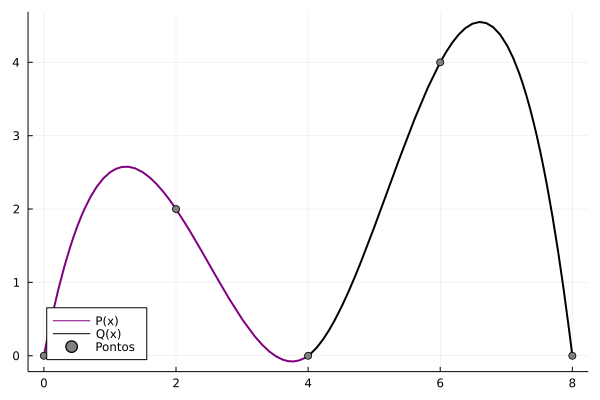

In [33]:
imprime_graficos(c)